<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow --upgrade tensorflow

In [3]:
#. Install all the necessary libraries and import them into the project.
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from tensorflow.keras.optimizers import Adam
from keras.utils import custom_object_scope
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


In [4]:
# Read and view the data set
( X_train , y_train ), ( X_test , y_test ) = mnist.load_data ()
print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
#output a portion of the training images and their corresponding labels.
image_number = random.randint (0, len ( X_train ) - 20)
plt.figure ( figsize =(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

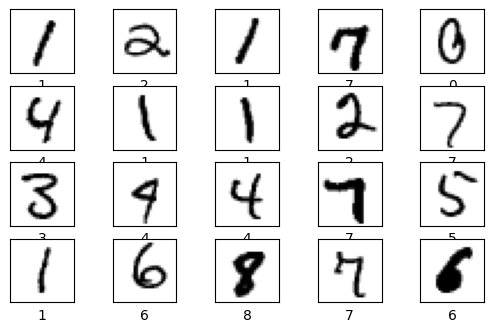

In [6]:
for i in range( image_number , image_number + 20):
 plt.subplot (5,5,i-image_number + 1)
 plt.xticks ([])
 plt.yticks ([])
 plt.grid (False)
 plt.imshow ( X_train [ i ], cmap = plt.cm.binary )
 plt.xlabel ( y_train [ i ])

In [7]:
# data preparation
batch_size , img_rows , img_cols = 64, 28, 28 # Size Images
X_train = X_train.reshape ( X_train.shape [0], img_rows ,
img_cols , 1)
X_test = X_test.reshape ( X_test.shape [0], img_rows , img_cols
, 1)
input_shape = ( img_rows , img_cols , 1)

In [8]:
# data normalization
X_train = X_train.astype ("float32")
X_test = X_test.astype ("float32")
X_train /= 255
X_test /= 255

In [10]:
#Convert tags to categories
Y_train = to_categorical ( y_train , 10)
Y_test = to_categorical ( y_test , 10)

In [11]:
#create a sequential model
model = Sequential()

In [12]:
model.add(Conv2D(75, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))

In [13]:
model.add (Dropout(0.5))
model.add (Dense(10, activation='softmax'))

In [14]:
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 75)        1950      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 75)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 75)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 100)         187600    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 100)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 100)         0

In [15]:
# model compilation
model.compile (loss= "categorical_crossentropy", optimizer= Adam(), metrics=["accuracy"])

In [18]:
cnn = Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1616 - accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0558 - accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0176 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0127 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0089 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [19]:
model.save ( 'Model_MNIST_CNN.hdf5' )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
scores = model.evaluate ( X_test , Y_test , verbose=0)
print("Test score: %f" % scores[0])
print("Test accuracy: %f" % scores[1])

Test score: 2.311565
Test accuracy: 0.071700


In [23]:
def compute_evaluation_metric (model, x_test , y_test ,
 y_predicted , y_predicted_prob ):
 print("\n Accuracy Score : \n ", accuracy_score (
 y_test,y_predicted ))
 print("\n Confusion Matrix : \n ", confusion_matrix ( y_test , y_predicted ))
 print("\n Classification Report : \n", classification_report ( y_test , y_predicted ))
 y_predicted_prob = model.predict ( X_test )
 y_predicted = y_predicted_prob.argmax (axis = 1). astype (int)
 compute_evaluation_metric (model, X_test , y_test , y_predicted , y_predicted_prob )

In [24]:
y_preds = cnn.predict(X_test)

313/313 [==============================] - 2s 8ms/step
